# Treatise of Medical Image Processing (TMIP)
## TMIP_BrainTumour

## Problem statement

Typically to classify a brain tumour, neurologists would go manually through MRI scans and multiple imaging modalities to locate the tumour and extract information. However going through over a hundred images per patient can be a tedious and time-consuming process.
Could we accelerate this process by classifying brain tumours based on their MRI scans before a neurologist starts looking at them? 

## Medical Approach
Brain tumours are among the most fatal cancers in the western population. Gliomas (tumours that arises from glial cells) are the most frequent type of primary brain tumours (70%). Astrocytomas, Oligodendrogliomas and Glioblastomas (GBM) are three classifications of gliomas. In particular GBMs are the most common primary brain tumors among adults. They tend to be very aggressive and grow rapidly. 

Magnetic Resonnance Imaging (MRI) is the imaging technique of choice for brain tumour diagnosis. It is often used in combination with other imaging techniques such as Positron Emission Tomography (PET) to provide a diagnosis.  
A typical brain MRI exam usually includes images of the brain along different axes (axial, cortical or sagital). TMIP_BrainTumour Project will only consider axial images at this stage. 

MRI examination may be approached using a multiple types of sequences that virtualize tissues to appear in different intensities according to the type of sequence. TMIP_BrainTumour Project utilises four types of sequences used in brain MRI examinations:
T1: on these images fat appears brighter and fluids darker
T1GD: T1 images after intravenous injection of a contrast agent (gadolinium)
T2: on these images fluids appear brighter and fat darker
FLAIR: T2 images where fluids are removed   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sqlalchemy import create_engine
%matplotlib inline
pd.set_option("display.max_columns",101)

In [2]:
tumour_features = pd.read_excel('VASARI_MRI_features (gmdi - wiki).xls')
tumour_features.head()

# Rename columns with meaningful names and drop ID and comments columns

cols = ['Sample','Radiologist','Tumor_Location','Side_of_Tumor_Epicenter','Eloquent_Brain','Enhancement_Quality',
        'Proportion_Enhancing','Proportion_nCET', 'Proportion_Necrosis','Cyst','Multifocal_or_Multicentric',
        'T1_FLAIR_Ratio','Thickness_Enhancing_Margin','Definition_Enhancing_Margin', 'Definition_Non_Enhancing_Margin',
        'Proportion_of_Edema','Edema_Crosses_Midline','Hemorrhage','Diffusion','Pial_Invasion','Ependymal_Invasion',
        'Cortical_Involvement','Deep_WM_Invasion','nCET_Tumor_Crosses_Midline','Enhancing_Tumor_Crosses_Midline',
        'Satellites','Calvarial_Remodeling','Extent_Resection_Enhancing_Tumor','Extent_Resection_nCET',
        'Extent_Resection_Vasogenic_Edema','Lesion_Size_x','Lesion_Size_y']

tumour_features = tumour_features.drop(['ID', 'comments'], axis=1)
tumour_features.columns = cols
tumour_features.head()

,Sample,Radiologist,Tumor_Location,Side_of_Tumor_Epicenter,Eloquent_Brain,Enhancement_Quality,Proportion_Enhancing,Proportion_nCET,Proportion_Necrosis,Cyst,Multifocal_or_Multicentric,T1_FLAIR_Ratio,Thickness_Enhancing_Margin,Definition_Enhancing_Margin,Definition_Non_Enhancing_Margin,Proportion_of_Edema,Edema_Crosses_Midline,Hemorrhage,Diffusion,Pial_Invasion,Ependymal_Invasion,Cortical_Involvement,Deep_WM_Invasion,nCET_Tumor_Crosses_Midline,Enhancing_Tumor_Crosses_Midline,Satellites,Calvarial_Remodeling,Extent_Resection_Enhancing_Tumor,Extent_Resection_nCET,Extent_Resection_Vasogenic_Edema,Lesion_Size_x,Lesion_Size_y
0,900_00_1961,Radiologist #1,"1, 2, 3",1,1,1,1,7,1,1,1,1,1,1,2,3,2,1,2,1,1,2,1,2,1,1,1,1,6,2,12,7
1,900_00_1961,Radiologist #2,"1, 3",1,1,1,1,8,1,1,1,1,1,1,2,2,1,1,4,1,1,2,1,2,1,1,1,1,5,1,11,8
2,900_00_1961,Radiologist #3,3,1,1,1,1,8,1,1,1,1,1,1,2,2,1,1,2,1,1,2,1,2,1,1,1,1,4,1,11,7
3,900_00_5299,Radiologist #1,2,1,1,3,4,3,4,1,1,2,4,2,2,5,2,1,1,2,1,2,1,2,2,1,1,7,2,3,10,9
4,900_00_5299,Radiologist #2,2,1,1,3,4,3,4,1,2,1,4,2,3,5,2,2,1,2,1,2,1,2,2,2,2,8,2,2,11,8


In [3]:
# Read in CSV and format dataframe

patients_info = pd.read_excel('clinical_2014-01-16.xlsx')
patients_info.drop(patients_info.columns[6:], axis=1, inplace=True)
patients_info.columns = ['Sample','Age','Gender','Survival_months','Disease','Grade']
patients_info.head()

,Sample,Age,Gender,Survival_months,Disease,Grade
0,900_00_1961,--,--,15,ASTROCYTOMA,II
1,900_00_5332,--,--,15,GBM,--
2,900_00_5308,--,--,17,ASTROCYTOMA,III
3,900_00_5316,--,--,17,GBM,--
4,900_00_5317,--,--,17,GBM,--


In [4]:
patients_info['Disease'].value_counts()

 ASTROCYTOMA          47
 GBM                  43
 OLIGODENDROGLIOMA    21
 --                   15
 MIXED                 1
Name: Disease, dtype: int64

In [5]:
# Calculate baseline accuracy ofthe whole dataset (for astrocytoma/gbm/oligodendroglioma diagnosis only)
baseline_whole = float(patients_info['Disease'].value_counts()[0])/float(np.sum([patients_info['Disease'].value_counts()[i] for i in range(3)]))
print('Baseline accuracy of the whole dataset:', np.round(baseline_whole*100, 2), '%')

Baseline accuracy of the whole dataset: 42.34 %


In [6]:
# Merge the two dataframes
tumours = pd.merge(patients_info[['Sample','Disease','Survival_months']], tumour_features, on='Sample', how='inner')

In [7]:
# Assign survival column type to int
tumours['Survival_months'] = tumours['Survival_months'].astype('int')

In [8]:
# Display first index of each disease

print('Astocytoma first index:', tumours.loc[tumours['Disease']==' ASTROCYTOMA', 'Disease'].index[0])
print('GBM first index:', tumours.loc[tumours['Disease']==' GBM', 'Disease'].index[0])
print('Oligodendroglioma first index:', tumours.loc[tumours['Disease']==' OLIGODENDROGLIOMA', 'Disease'].index[0])

Astocytoma first index: 0
GBM first index: 3
Oligodendroglioma first index: 21


In [9]:
# Encode Disease column
from sklearn.preprocessing import LabelEncoder

tumours['Disease'] = LabelEncoder().fit_transform(tumours['Disease'])

tumours.head()

,Sample,Disease,Survival_months,Radiologist,Tumor_Location,Side_of_Tumor_Epicenter,Eloquent_Brain,Enhancement_Quality,Proportion_Enhancing,Proportion_nCET,Proportion_Necrosis,Cyst,Multifocal_or_Multicentric,T1_FLAIR_Ratio,Thickness_Enhancing_Margin,Definition_Enhancing_Margin,Definition_Non_Enhancing_Margin,Proportion_of_Edema,Edema_Crosses_Midline,Hemorrhage,Diffusion,Pial_Invasion,Ependymal_Invasion,Cortical_Involvement,Deep_WM_Invasion,nCET_Tumor_Crosses_Midline,Enhancing_Tumor_Crosses_Midline,Satellites,Calvarial_Remodeling,Extent_Resection_Enhancing_Tumor,Extent_Resection_nCET,Extent_Resection_Vasogenic_Edema,Lesion_Size_x,Lesion_Size_y
0,900_00_1961,0,15,Radiologist #1,"1, 2, 3",1,1,1,1,7,1,1,1,1,1,1,2,3,2,1,2,1,1,2,1,2,1,1,1,1,6,2,12,7
1,900_00_1961,0,15,Radiologist #2,"1, 3",1,1,1,1,8,1,1,1,1,1,1,2,2,1,1,4,1,1,2,1,2,1,1,1,1,5,1,11,8
2,900_00_1961,0,15,Radiologist #3,3,1,1,1,1,8,1,1,1,1,1,1,2,2,1,1,2,1,1,2,1,2,1,1,1,1,4,1,11,7
3,900_00_5332,1,15,Radiologist #1,2,3,1,3,4,5,5,1,1,1,4,2,2,4,2,1,4,2,2,2,1,2,2,1,1,5,5,2,9,11
4,900_00_5332,1,15,Radiologist #2,2,3,3,3,5,4,5,1,1,2,4,2,2,3,2,2,3,2,2,2,1,2,2,1,1,6,2,2,13,11


In [10]:
# Display encoded numbers associated with each disease

print('Astocytoma:', tumours.iloc[0, 1])
print('GBM:', tumours.iloc[3, 1])
print('Oligodendroglioma:', tumours.iloc[21, 1])

Astocytoma: 0
GBM: 1
Oligodendroglioma: 2


In [11]:
# Create a new dataframe with only one line per patient: 
# value is assigned to the most frequent score between the three radiologists 
# or if there are three different values to score from radiologist #2

dicty = {}
for col in tumours.columns[4:]:
    dicty[col]=[]
    for sample in tumours['Sample'].unique():
        count = tumours.loc[tumours['Sample']==sample, col].value_counts().sort_values(ascending=False)
        if len(count) == 2:
            dicty[col].append(count.index[0])
        else:
            dicty[col].append(tumours.loc[(tumours['Sample']==sample) & (tumours['Radiologist']=='Radiologist #2'), col].values[0])

In [12]:
target = tumours.iloc[range(0,96,3), 0:3].reset_index()            
tumours_clean = target.join(pd.DataFrame(dicty))
tumours_clean.drop(['index'], axis=1, inplace=True)
tumours_clean.to_csv('tumours_target_features.csv')#ABint
tumours_clean.head()

,Sample,Disease,Survival_months,Calvarial_Remodeling,Cortical_Involvement,Cyst,Deep_WM_Invasion,Definition_Enhancing_Margin,Definition_Non_Enhancing_Margin,Diffusion,Edema_Crosses_Midline,Eloquent_Brain,Enhancement_Quality,Enhancing_Tumor_Crosses_Midline,Ependymal_Invasion,Extent_Resection_Enhancing_Tumor,Extent_Resection_Vasogenic_Edema,Extent_Resection_nCET,Hemorrhage,Lesion_Size_x,Lesion_Size_y,Multifocal_or_Multicentric,Pial_Invasion,Proportion_Enhancing,Proportion_Necrosis,Proportion_nCET,Proportion_of_Edema,Satellites,Side_of_Tumor_Epicenter,T1_FLAIR_Ratio,Thickness_Enhancing_Margin,Tumor_Location,nCET_Tumor_Crosses_Midline
0,900_00_1961,0,15,1,2,1,1,1,2,2,1,1,1,1,1,1,1,5,1,11,7,1,1,1,1,8,2,1,1,1,1,"1, 3",2
1,900_00_5332,1,15,1,2,1,1,2,2,4,2,3,3,2,2,5,2,5,2,13,11,1,2,4,5,5,4,1,3,2,4,2,2
2,900_00_5308,0,17,1,2,1,1,2,2,1,1,1,3,2,2,8,1,5,1,11,8,1,1,4,4,5,2,1,1,1,4,2,2
3,900_00_5316,1,17,1,2,1,1,2,2,1,2,1,3,2,1,7,2,1,1,14,9,1,1,4,4,5,4,1,3,2,4,4,2
4,900_00_5317,1,17,1,2,1,2,2,3,1,2,5,3,2,2,5,2,4,1,18,12,1,1,4,5,4,3,1,1,2,4,"1, 2, 3",2


In [13]:
# Read clean csv file back in
tumours = pd.read_csv('tumours_target_features.csv', encoding='UTF8',index_col=0)

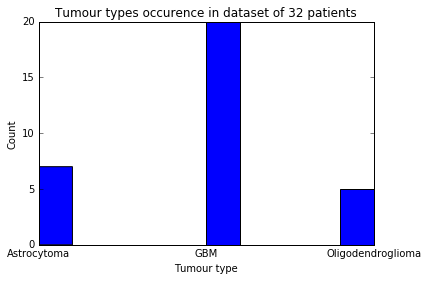

In [14]:
# Plot histogramme of tumour type in dataset (32 patients)

plt.hist(tumours['Disease'])
plt.xticks([0,1,2],['Astrocytoma', 'GBM', 'Oligodendroglioma'])
plt.xlabel('Tumour type')
plt.ylabel('Count')
plt.title('Tumour types occurence in dataset of 32 patients')
plt.show()

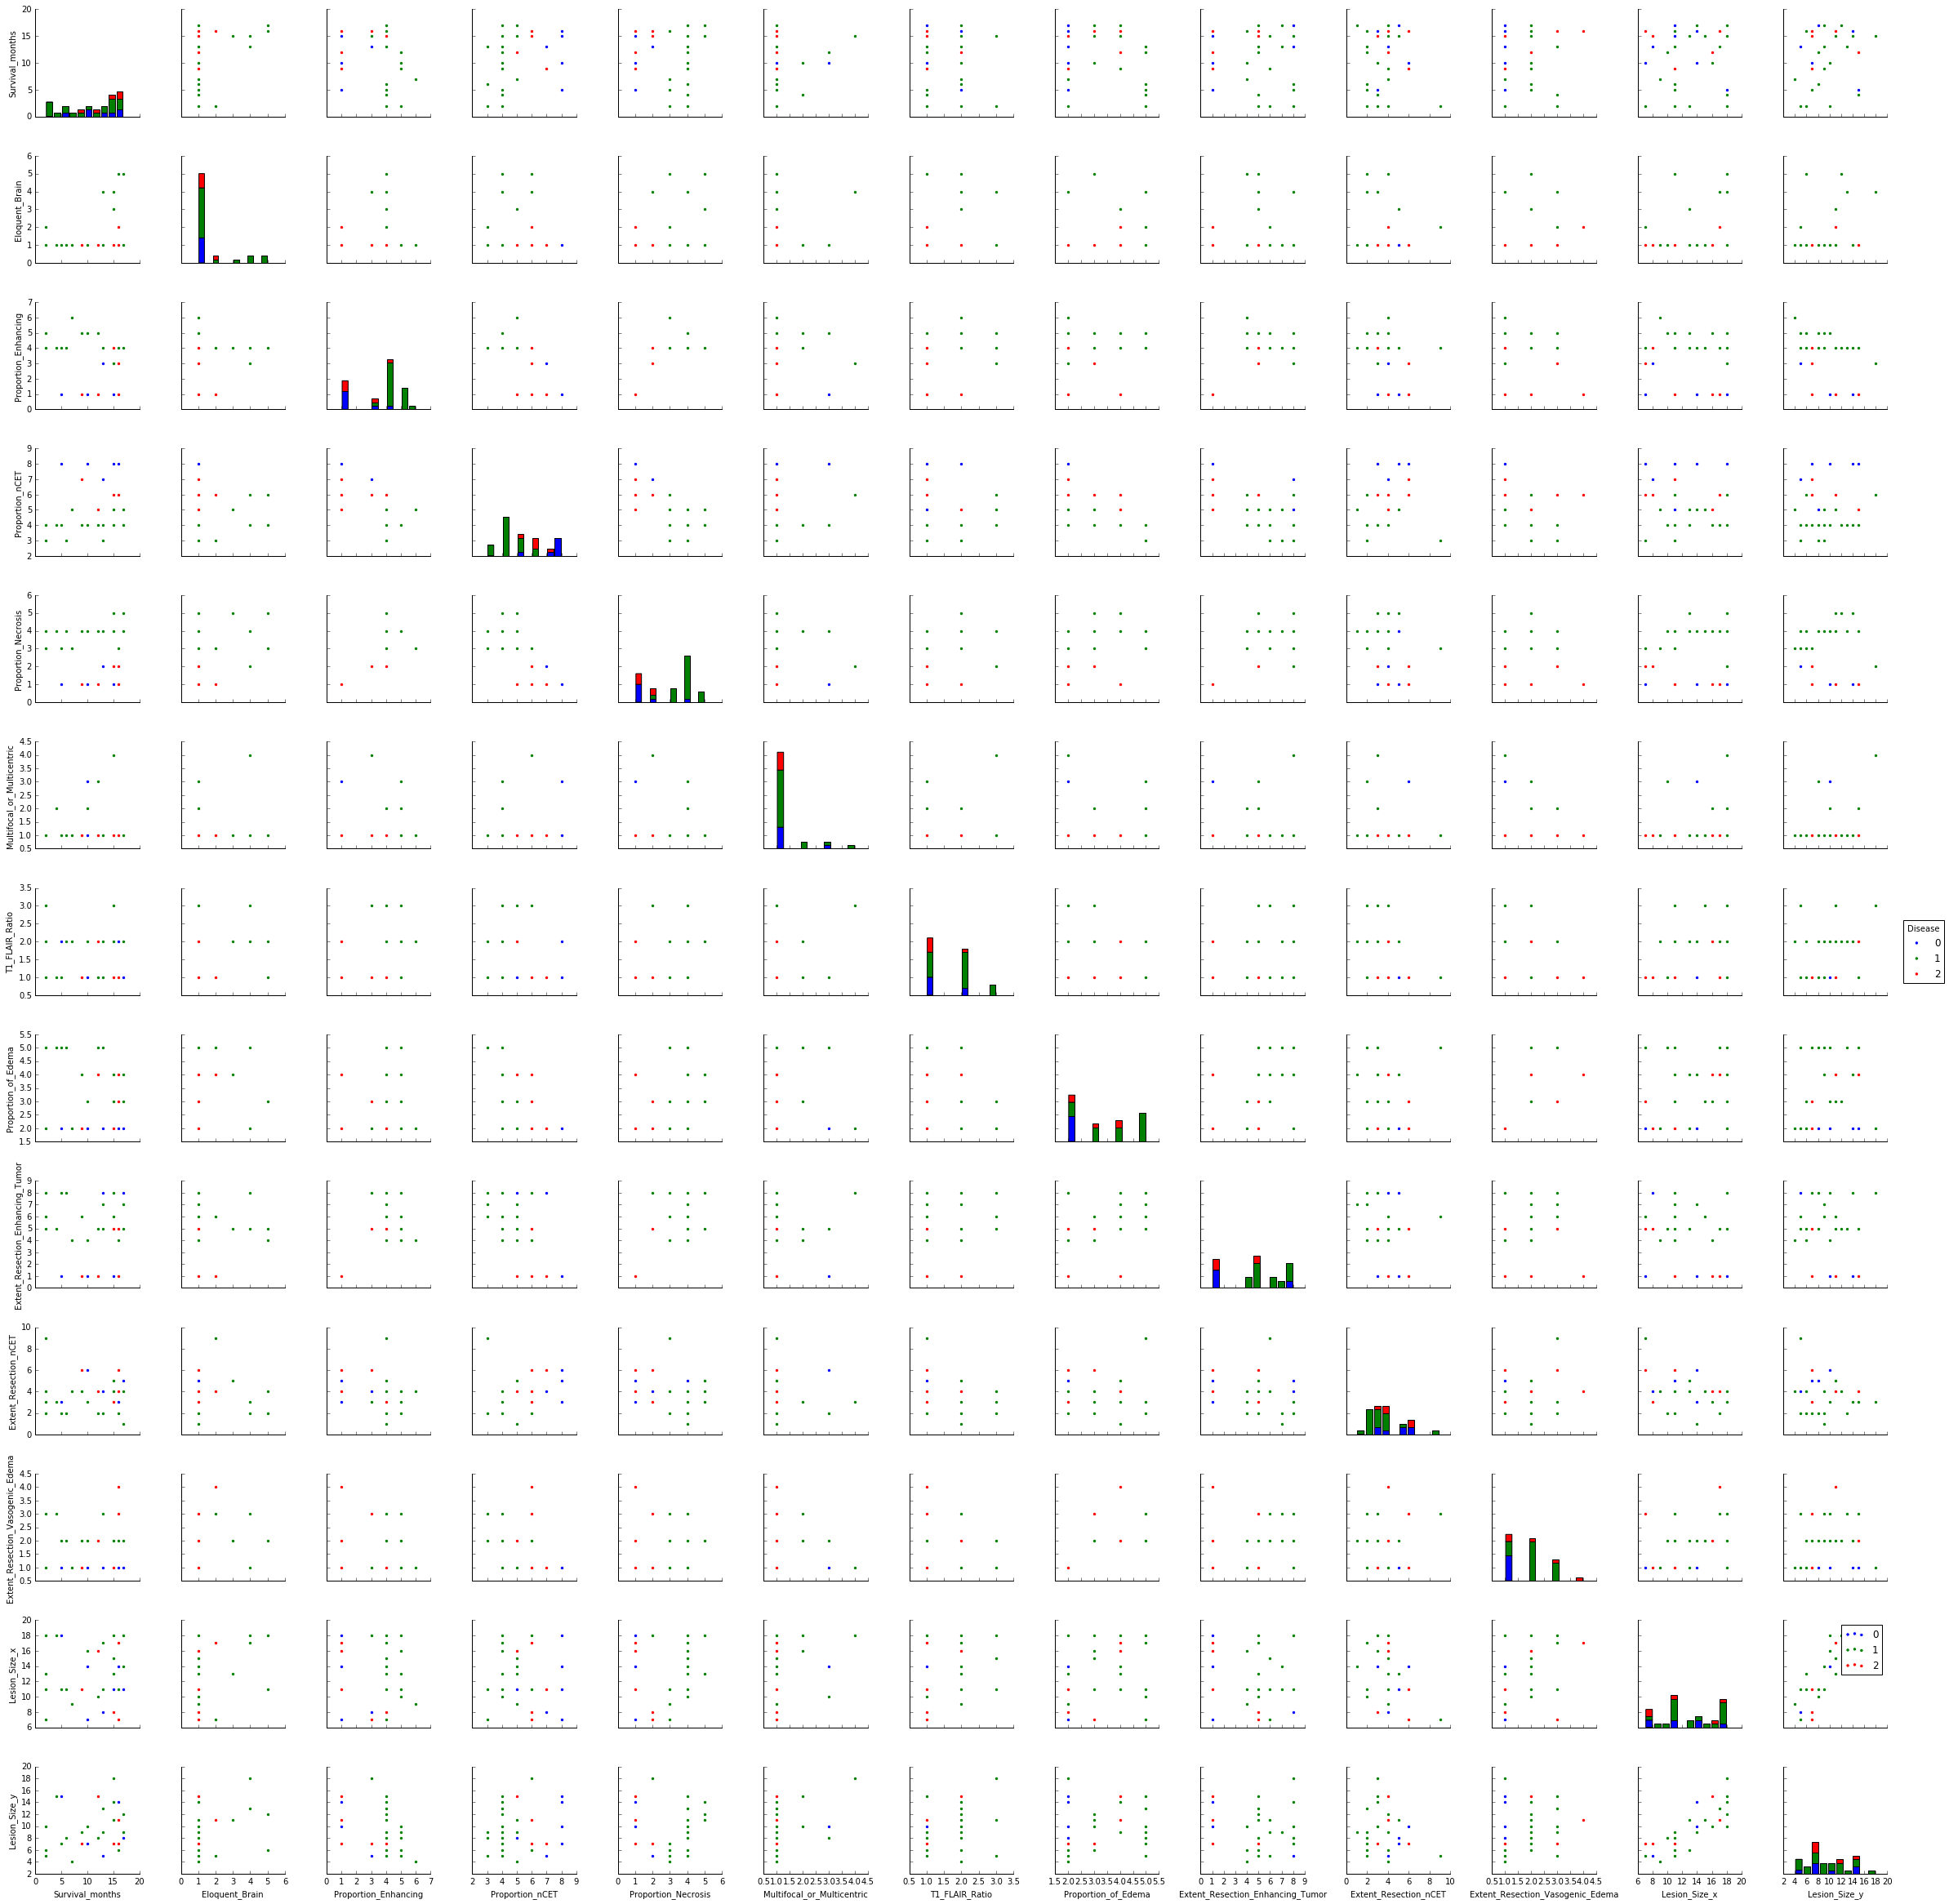

In [15]:
# Plot relations between variables and display tumour types

sns.pairplot(tumours, hue='Disease', hue_order=[0,1,2], vars=['Survival_months',
                                            'Eloquent_Brain','Proportion_Enhancing','Proportion_nCET',
                                            'Proportion_Necrosis','Multifocal_or_Multicentric','T1_FLAIR_Ratio',
                                            'Proportion_of_Edema','Extent_Resection_Enhancing_Tumor',
                                            'Extent_Resection_nCET','Extent_Resection_Vasogenic_Edema',
                                            'Lesion_Size_x', 'Lesion_Size_y'])
plt.legend()
plt.show()

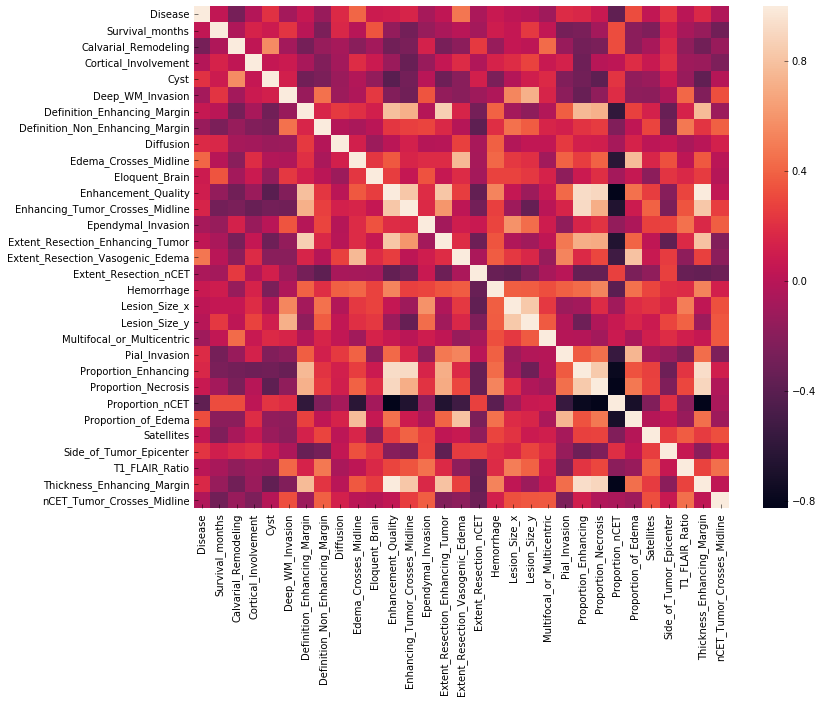

In [16]:
#Plot correlation heatmap

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(tumours.corr())

Based on this first exploratory analysis, the tumor type ('Disease') doesn't seem to be particularly correlated to any specific features (there seems to be a slight correlation to edema features and nCET).  
Some features such as Lesion_size_x and Lesion_size_y or Proportions of enhancing tissue, necrosis and nCET seem to be strongly correlated. Therefore we will apply some techniques such as Lasso, PCA and LDA to try and reduce the influence of correlated features.

In [17]:
from sklearn.preprocessing import MinMaxScaler

X = tumours.drop(['Sample', 'Disease', 'Survival_months', 'Tumor_Location'], axis=1)
X_cols = X.columns
X = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X, columns=X_cols)
X.head()

,Calvarial_Remodeling,Cortical_Involvement,Cyst,Deep_WM_Invasion,Definition_Enhancing_Margin,Definition_Non_Enhancing_Margin,Diffusion,Edema_Crosses_Midline,Eloquent_Brain,Enhancement_Quality,Enhancing_Tumor_Crosses_Midline,Ependymal_Invasion,Extent_Resection_Enhancing_Tumor,Extent_Resection_Vasogenic_Edema,Extent_Resection_nCET,Hemorrhage,Lesion_Size_x,Lesion_Size_y,Multifocal_or_Multicentric,Pial_Invasion,Proportion_Enhancing,Proportion_Necrosis,Proportion_nCET,Proportion_of_Edema,Satellites,Side_of_Tumor_Epicenter,T1_FLAIR_Ratio,Thickness_Enhancing_Margin,nCET_Tumor_Crosses_Midline
0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500,0.0,0.363636,0.214286,0.0,0.0,0.0,0.00,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.5,0.0,1.000000,0.5,0.5,1.0,0.5,1.0,0.571429,0.333333,0.500,1.0,0.545455,0.500000,0.0,1.0,0.6,1.00,0.4,0.666667,0.0,1.0,0.5,1.0,0.0
2,0.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.0,0.0,1.0,0.5,1.0,1.000000,0.000000,0.500,0.0,0.363636,0.285714,0.0,0.0,0.6,0.75,0.4,0.000000,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.5,0.0,1.0,0.5,0.0,0.857143,0.333333,0.000,0.0,0.636364,0.357143,0.0,0.0,0.6,0.75,0.4,0.666667,0.0,1.0,0.5,1.0,0.0
4,0.0,1.0,0.0,1.0,0.5,1.0,0.000000,0.5,1.0,1.0,0.5,1.0,0.571429,0.333333,0.375,0.0,1.000000,0.571429,0.0,0.0,0.6,1.00,0.2,0.333333,0.0,0.0,0.5,1.0,0.0


In [18]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

pd.DataFrame(np.cumsum([round(i*100, 2) for i in pca.explained_variance_ratio_]), index=range(1,30), columns=['Cumulative % of Variance Explained']).head(10)

,Cumulative % of Variance Explained
1,30.74
2,47.93
3,59.78
4,67.76
5,73.62
6,78.13
7,81.67
8,84.97
9,87.79
10,90.27


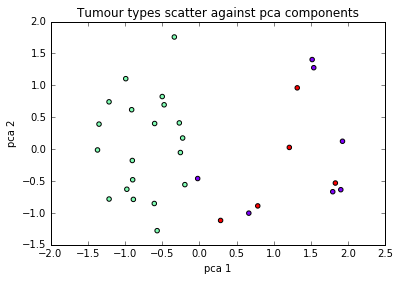

In [19]:
X_pca = PCA(n_components=2).fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=tumours['Disease'], cmap='rainbow')
plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.title('Tumour types scatter against pca components')
plt.show()

In [20]:
y = tumours['Disease']

In [21]:
print('Baseline accuracy:', y.value_counts()[1]/float(len(y)))

Baseline accuracy: 0.625


In [22]:
# Store all model scores in a list of tuples to compare them
model_scores = []

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

logreg = LogisticRegression()

print('Cross validated accuracy scores logistic regression C=1, Ridge penalty:', cross_val_score(logreg, X, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(logreg, X, y, cv=3).mean())

Cross validated accuracy scores logistic regression C=1, Ridge penalty: [ 0.83333333  0.63636364  0.77777778]
Mean cross validated accuracy: 0.749158249158


In [24]:
gs_logreg = GridSearchCV(logreg, {'C': [10e-5, 10e-4, 10e-3, 10e-2, 0.1, 1, 10, 100, 10e3], 'penalty':['l1','l2']})
gs_logreg.fit(X,y)

print('Regression parameters:', gs_logreg.best_params_, '\n')

print('Cross validated accuracy logistic regression C=10, Ridge penalty (optimised):', gs_logreg.best_score_)

model_scores.append(('gs_logreg', gs_logreg.best_score_))

Regression parameters: {'penalty': 'l2', 'C': 10} 

Cross validated accuracy logistic regression C=10, Ridge penalty (optimised): 0.78125


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y, cross_val_predict(gs_logreg.best_estimator_, X, y, cv=3)))
print(classification_report(y, cross_val_predict(gs_logreg.best_estimator_, X, y, cv=3)))

[[ 3  1  3]
 [ 1 19  0]
 [ 2  0  3]]
             precision    recall  f1-score   support

          0       0.50      0.43      0.46         7
          1       0.95      0.95      0.95        20
          2       0.50      0.60      0.55         5

avg / total       0.78      0.78      0.78        32



In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

print('Cross validated accuracy scores KNN 5 neighbours:', cross_val_score(knn, X, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(knn, X, y, cv=3).mean())

Cross validated accuracy scores KNN 5 neighbours: [ 0.83333333  0.72727273  0.66666667]
Mean cross validated accuracy: 0.742424242424


Optimise model with GridSearchCV

In [27]:
gs_knn = GridSearchCV(knn, {'n_neighbors': range(1, 11)})
gs_knn.fit(X,y)

print('KNN parameters:', gs_knn.best_params_, '\n')

print('Cross validated accuracy KNN 6 neighbours:', gs_knn.best_score_)

model_scores.append(('gs_knn', gs_knn.best_score_))

KNN parameters: {'n_neighbors': 6} 

Cross validated accuracy KNN 6 neighbours: 0.8125


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
rfc = RandomForestClassifier()

print('Cross validated accuracy scores random forest:', cross_val_score(rfc, X, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(rfc, X, y, cv=3).mean())

Cross validated accuracy scores random forest: [ 0.83333333  0.90909091  0.55555556]
Mean cross validated accuracy: 0.770202020202


In [29]:
gs_rfc = GridSearchCV(rfc, {'n_estimators': range(5, 85, 5)})
gs_rfc.fit(X,y)

print('Random forest parameters:', gs_rfc.best_params_, '\n')

print('Cross validated accuracy Random Forest 15 estimators:', gs_rfc.best_score_)

model_scores.append(('gs_rfc', gs_rfc.best_score_))

Random forest parameters: {'n_estimators': 55} 

Cross validated accuracy Random Forest 15 estimators: 0.875


In [30]:
print(confusion_matrix(y, cross_val_predict(gs_rfc.best_estimator_, X, y, cv=3)))
print(classification_report(y, cross_val_predict(gs_rfc.best_estimator_, X, y, cv=3)))

[[ 5  1  1]
 [ 0 20  0]
 [ 2  0  3]]
             precision    recall  f1-score   support

          0       0.67      0.57      0.62         7
          1       0.86      0.95      0.90        20
          2       0.50      0.40      0.44         5

avg / total       0.76      0.78      0.77        32



In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

X_lda = lda.fit_transform(X, y)
lda.explained_variance_ratio_

array([ 0.97163295,  0.02836705])

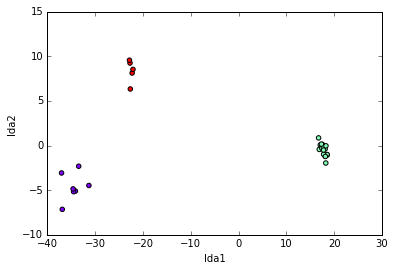

In [32]:
plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='rainbow')
plt.xlabel('lda1')
plt.ylabel('lda2')
plt.show()

In [33]:
print('Cross validated accuracy scores LDA:', cross_val_score(lda, X, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(lda, X, y, cv=3).mean())

model_scores.append(('LDA',cross_val_score(lda, X, y, cv=3).mean()))

Cross validated accuracy scores LDA: [ 0.83333333  0.72727273  0.22222222]
Mean cross validated accuracy: 0.594276094276


/home/xenialxerus/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/xenialxerus/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/xenialxerus/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/xenialxerus/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/xenialxerus/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/xenialxerus/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are colli

In [34]:
print(confusion_matrix(y, cross_val_predict(lda, X, y, cv=3)))
print(classification_report(y, cross_val_predict(lda, X, y, cv=3)))

[[ 4  1  2]
 [ 4 13  3]
 [ 1  1  3]]
             precision    recall  f1-score   support

          0       0.44      0.57      0.50         7
          1       0.87      0.65      0.74        20
          2       0.38      0.60      0.46         5

avg / total       0.70      0.62      0.65        32



/home/xenialxerus/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/xenialxerus/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/xenialxerus/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/xenialxerus/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/xenialxerus/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/xenialxerus/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are colli

In [35]:
from sklearn.naive_bayes import MultinomialNB

nbm = MultinomialNB()

print('Cross validated accuracy scores Naive Bayes:', cross_val_score(nbm, X, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(nbm, X, y, cv=3).mean())

model_scores.append(('NBm', cross_val_score(nbm, X, y, cv=3).mean()))

Cross validated accuracy scores Naive Bayes: [ 0.75        0.72727273  0.77777778]
Mean cross validated accuracy: 0.751683501684


In [36]:
print(confusion_matrix(y, cross_val_predict(nbm, X, y, cv=3)))
print(classification_report(y, cross_val_predict(nbm, X, y, cv=3)))

[[ 4  2  1]
 [ 1 19  0]
 [ 2  2  1]]
             precision    recall  f1-score   support

          0       0.57      0.57      0.57         7
          1       0.83      0.95      0.88        20
          2       0.50      0.20      0.29         5

avg / total       0.72      0.75      0.72        32



In [37]:
print('Model scores', model_scores)

Model scores [('gs_logreg', 0.78125), ('gs_knn', 0.8125), ('gs_rfc', 0.875), ('LDA', 0.59427609427609429), ('NBm', 0.75168350168350173)]


In [38]:
rfc_opt = gs_rfc.best_estimator_

In [39]:
# Feature importance in Random Forest model
rfc_top10 = pd.DataFrame({'columns':X.columns, 
                      'feature_importances_rfc':rfc_opt.feature_importances_}).sort_values('feature_importances_rfc', 
                                                                                            ascending=False).head(10)
rfc_top10

,columns,feature_importances_rfc
22,Proportion_nCET,0.121462
27,Thickness_Enhancing_Margin,0.112232
21,Proportion_Necrosis,0.106723
9,Enhancement_Quality,0.092281
13,Extent_Resection_Vasogenic_Edema,0.057816
12,Extent_Resection_Enhancing_Tumor,0.055547
20,Proportion_Enhancing,0.054501
4,Definition_Enhancing_Margin,0.047747
16,Lesion_Size_x,0.044729
7,Edema_Crosses_Midline,0.040110


## Assess model performances on 3 most important features selected by the Random Forest model


In [40]:
X_3cols = X[['Proportion_nCET', 'Thickness_Enhancing_Margin', 'Enhancement_Quality']]

In [41]:
print('Cross validated accuracy scores logistic regression on RF 3 columns:', cross_val_score(gs_logreg.best_estimator_, X_3cols, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(gs_logreg.best_estimator_, X_3cols, y, cv=3).mean())

model_scores.append(('Logreg_rf3', cross_val_score(gs_logreg.best_estimator_, X_3cols, y, cv=3).mean()))

Cross validated accuracy scores logistic regression on RF 3 columns: [ 0.75        0.90909091  0.88888889]
Mean cross validated accuracy: 0.849326599327


In [42]:
print('Cross validated accuracy scores knn on RF 3 columns:', cross_val_score(gs_knn.best_estimator_, X_3cols, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(gs_knn.best_estimator_, X_3cols, y, cv=3).mean())

model_scores.append(('KNN_rf3', cross_val_score(gs_knn.best_estimator_, X_3cols, y, cv=3).mean()))

Cross validated accuracy scores knn on RF 3 columns: [ 0.75        0.81818182  0.88888889]
Mean cross validated accuracy: 0.819023569024


In [43]:
print('Cross validated accuracy scores random forest on 3 most important features:', cross_val_score(rfc_opt, X_3cols, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(rfc_opt, X_3cols, y, cv=3).mean())

model_scores.append(('rfc_rf3', cross_val_score(rfc_opt, X_3cols, y, cv=3).mean()))

Cross validated accuracy scores random forest on 3 most important features: [ 0.91666667  0.90909091  0.88888889]
Mean cross validated accuracy: 0.941919191919


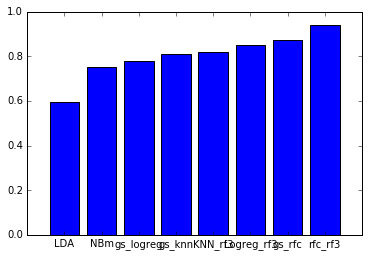

In [44]:
model_scores.sort(key=lambda tup: tup[1])

plt.bar(range(8), [tup[1] for tup in model_scores], align='center')
plt.xticks(range(8), [tup[0] for tup in model_scores])
plt.show()

In [45]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selected_data = selector.fit_transform(X, y)

kbest_columns = X.columns[selector.get_support()]
Xtbest = pd.DataFrame(selected_data, columns=kbest_columns)

# p-values of each feature in SelectKBest
SelectKBest_top10 = pd.DataFrame({'columns':X.columns, 'p_values':selector.pvalues_}).sort_values('p_values').head(10)
SelectKBest_top10

,columns,p_values
9,Enhancement_Quality,1.222770e-10
27,Thickness_Enhancing_Margin,7.099996e-10
22,Proportion_nCET,2.079979e-08
21,Proportion_Necrosis,6.455087e-08
20,Proportion_Enhancing,2.704213e-07
10,Enhancing_Tumor_Crosses_Midline,5.254509e-05
12,Extent_Resection_Enhancing_Tumor,1.535407e-03
15,Hemorrhage,1.547425e-03
23,Proportion_of_Edema,1.682849e-03
4,Definition_Enhancing_Margin,2.458544e-03


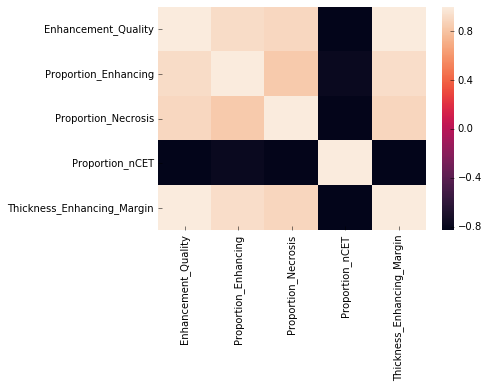

In [46]:
# Plot correlations between selected 5 features
sns.heatmap(tumours[kbest_columns].corr())

In [47]:
print('Cross validated accuracy scores logistic regression on KBest columns:', cross_val_score(gs_logreg.best_estimator_, Xtbest, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(gs_logreg.best_estimator_, Xtbest, y, cv=3).mean())

model_scores.append(('Logreg_kbest', cross_val_score(gs_logreg.best_estimator_, Xtbest, y, cv=3).mean()))

Cross validated accuracy scores logistic regression on KBest columns: [ 0.75        0.90909091  0.88888889]
Mean cross validated accuracy: 0.849326599327


In [48]:
print('Cross validated accuracy scores knn on KBest columns:', cross_val_score(gs_knn.best_estimator_, Xtbest, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(gs_knn.best_estimator_, Xtbest, y, cv=3).mean())

model_scores.append(('KNN_kbest', cross_val_score(gs_knn.best_estimator_, Xtbest, y, cv=3).mean()))

Cross validated accuracy scores knn on KBest columns: [ 0.75        0.81818182  0.88888889]
Mean cross validated accuracy: 0.819023569024


In [49]:
print('Cross validated accuracy scores random forest on KBest columns:', cross_val_score(gs_rfc.best_estimator_, Xtbest, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(gs_rfc.best_estimator_, Xtbest, y, cv=3).mean())

model_scores.append(('rfc_kbest', cross_val_score(gs_rfc.best_estimator_, Xtbest, y, cv=3).mean()))

Cross validated accuracy scores random forest on KBest columns: [ 0.91666667  0.90909091  0.88888889]
Mean cross validated accuracy: 0.904882154882


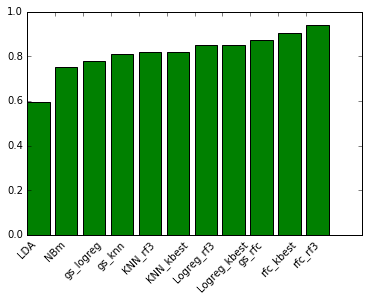

In [50]:
model_scores.sort(key=lambda tup: tup[1])

plt.bar(range(11), [tup[1] for tup in model_scores],color="green")
plt.xticks(range(11), [tup[0] for tup in model_scores], rotation=45)
plt.show()

## Recursive Feature Elimination (RFE)

In [51]:
from sklearn.feature_selection import RFE

# Features rank in logistic regression RFE
rfe_logreg = RFE(gs_logreg.best_estimator_, n_features_to_select=1)
rfe_logreg.fit(X, y)

RFE_logreg_top10 = pd.DataFrame({'columns':X.columns, 
                              'ranking_RFE_logreg':rfe_logreg.ranking_}).sort_values('ranking_RFE_logreg').head(10)
RFE_logreg_top10

,columns,ranking_RFE_logreg
9,Enhancement_Quality,1
22,Proportion_nCET,2
13,Extent_Resection_Vasogenic_Edema,3
15,Hemorrhage,4
26,T1_FLAIR_Ratio,5
2,Cyst,6
0,Calvarial_Remodeling,7
23,Proportion_of_Edema,8
10,Enhancing_Tumor_Crosses_Midline,9
25,Side_of_Tumor_Epicenter,10


In [52]:
# Define X with only 5 bets features
rfe_logreg = RFE(gs_logreg.best_estimator_, n_features_to_select=5)
X_rfe_logreg = rfe_logreg.fit_transform(X, y)
rfe_logreg_columns = X.columns[rfe_logreg.get_support()]
X_rfe_logreg = pd.DataFrame(X_rfe_logreg, columns=rfe_logreg_columns)

In [53]:
print('Cross validated accuracy scores RFE logistic regression:', cross_val_score(rfe_logreg, X, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(rfe_logreg, X, y, cv=3).mean())

model_scores.append(('logreg_rfe', cross_val_score(rfe_logreg, X, y, cv=3).mean()))

Cross validated accuracy scores RFE logistic regression: [ 0.83333333  0.81818182  0.44444444]
Mean cross validated accuracy: 0.698653198653


In [54]:
# Features rank in random forest RFE
rfe_rf = RFE(rfc_opt, n_features_to_select=1)
rfe_rf.fit(X, y)

RFE_rfc_top10 = pd.DataFrame({'columns':X.columns, 
                              'ranking_RFE_rfc':rfe_rf.ranking_}).sort_values('ranking_RFE_rfc').head(10)
RFE_rfc_top10

,columns,ranking_RFE_rfc
22,Proportion_nCET,1
27,Thickness_Enhancing_Margin,2
9,Enhancement_Quality,3
7,Edema_Crosses_Midline,4
21,Proportion_Necrosis,5
20,Proportion_Enhancing,6
14,Extent_Resection_nCET,7
13,Extent_Resection_Vasogenic_Edema,8
16,Lesion_Size_x,9
4,Definition_Enhancing_Margin,10


In [55]:
# Define X with only 5 best features
rfe_rf = RFE(rfc_opt, n_features_to_select=5)
X_rfe_rf = rfe_rf.fit_transform(X, y)

rfe_rf_columns = X.columns[rfe_rf.get_support()]
X_rfe_rf = pd.DataFrame(X_rfe_rf, columns=rfe_rf_columns)

In [56]:
print('Cross validated accuracy scores RFE random forest:', cross_val_score(rfe_rf, X, y, cv=3))
print('Mean cross validated accuracy:', cross_val_score(rfe_rf, X, y, cv=3).mean())

model_scores.append(('rfc_rfe', cross_val_score(rfe_rf, X, y, cv=3).mean()))

Cross validated accuracy scores RFE random forest: [ 0.91666667  0.90909091  0.55555556]
Mean cross validated accuracy: 0.793771043771


In [57]:
# Feature importances according to the three techniques: Random Forest, SelectKBest and RFE on Random Forest
pd.DataFrame({'rfc_top10':rfc_top10['columns'].values, 
              'SelectKBest_top10':SelectKBest_top10['columns'].values,
              'RFE_logreg_top10':RFE_logreg_top10['columns'].values,
              'RFE_rfc_top10':RFE_rfc_top10['columns'].values})

,RFE_logreg_top10,RFE_rfc_top10,SelectKBest_top10,rfc_top10
0,Enhancement_Quality,Proportion_nCET,Enhancement_Quality,Proportion_nCET
1,Proportion_nCET,Thickness_Enhancing_Margin,Thickness_Enhancing_Margin,Thickness_Enhancing_Margin
2,Extent_Resection_Vasogenic_Edema,Enhancement_Quality,Proportion_nCET,Proportion_Necrosis
3,Hemorrhage,Edema_Crosses_Midline,Proportion_Necrosis,Enhancement_Quality
4,T1_FLAIR_Ratio,Proportion_Necrosis,Proportion_Enhancing,Extent_Resection_Vasogenic_Edema
5,Cyst,Proportion_Enhancing,Enhancing_Tumor_Crosses_Midline,Extent_Resection_Enhancing_Tumor
6,Calvarial_Remodeling,Extent_Resection_nCET,Extent_Resection_Enhancing_Tumor,Proportion_Enhancing
7,Proportion_of_Edema,Extent_Resection_Vasogenic_Edema,Hemorrhage,Definition_Enhancing_Margin
8,Enhancing_Tumor_Crosses_Midline,Lesion_Size_x,Proportion_of_Edema,Lesion_Size_x
9,Side_of_Tumor_Epicenter,Definition_Enhancing_Margin,Definition_Enhancing_Margin,Edema_Crosses_Midline


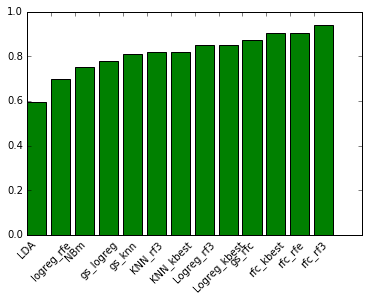

In [58]:
model_scores.sort(key=lambda tup: tup[1])

plt.bar(range(13), [tup[1] for tup in model_scores], color="green")
plt.xticks(range(13), [tup[0] for tup in model_scores], rotation=45)
plt.show()

## Cross-validated results of chosen model: Random forest (n=25) with 5 best features

In [59]:
acc_cv_mean = cross_val_score(rfc_opt, Xtbest, y, cv=3).mean()
acc_cv_std = cross_val_score(rfc_opt, Xtbest, y, cv=3).std()

print('Accuracy:', round(acc_cv_mean,4), '+/-', round(acc_cv_std,4))

Accuracy: 0.9049 +/- 0.0117


In [60]:
print('Predicted probabilities of tumour types:')
pd.DataFrame(cross_val_predict(gs_rfc.best_estimator_, Xtbest, y, cv=3, method='predict_proba'), 
             columns=['0 - Astrocytoma', '1 - GBM', '2 - Oligodendroglioma']).join(tumours['Disease'])

Predicted probabilities of tumour types:


,0 - Astrocytoma,1 - GBM,2 - Oligodendroglioma,Disease
0,0.981818,0.000000,0.018182,0
1,0.000000,1.000000,0.000000,1
2,0.000000,1.000000,0.000000,0
3,0.000000,1.000000,0.000000,1
4,0.000000,1.000000,0.000000,1
5,0.000000,1.000000,0.000000,1
6,0.181818,0.490909,0.327273,1
7,0.218182,0.236364,0.545455,2
8,0.000000,1.000000,0.000000,1
9,0.090909,0.018182,0.890909,2


In [61]:
print('Confusion matrix')
pd.DataFrame(confusion_matrix(y, cross_val_predict(gs_rfc.best_estimator_, Xtbest, y, cv=3)), 
             columns = ['predicted_Astrocytoma', 'predicted_GBM', 'predicted_Oligodendroglioma'],
             index = ['actual_Astrocytoma', 'actual_GBM', 'actual_Oligodendroglioma'])

Confusion matrix


,predicted_Astrocytoma,predicted_GBM,predicted_Oligodendroglioma
actual_Astrocytoma,5,1,1
actual_GBM,0,20,0
actual_Oligodendroglioma,1,0,4


In [62]:
print('Classification report')
print(classification_report(y, cross_val_predict(gs_rfc.best_estimator_, Xtbest, y, cv=3)))

Classification report
             precision    recall  f1-score   support

          0       0.83      0.71      0.77         7
          1       0.95      1.00      0.98        20
          2       0.80      0.80      0.80         5

avg / total       0.90      0.91      0.90        32



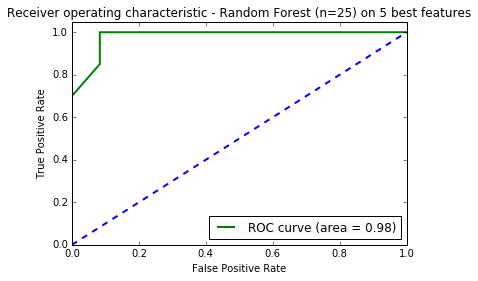

In [63]:
# Plot ROC curve of GBM vs non-GBM (two classes output instead of three)

y_bin = [1 if i==1 else 0 for i in y]
y_bin_score = cross_val_predict(gs_rfc.best_estimator_, Xtbest, y_bin, cv=3, method='predict_proba')[:,1]

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_bin, y_bin_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='g',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Random Forest (n=25) on 5 best features')
plt.legend(loc="lower right")
plt.show()

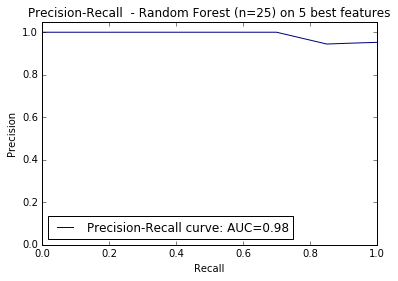

In [64]:
# Plot precision-recall curve of GBM vs non-GBM

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_bin, y_bin_score)
average_precision = average_precision_score(y_bin, y_bin_score)

plt.plot(recall, precision, color='navy', 
         label='Precision-Recall curve: AUC={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall  - Random Forest (n=25) on 5 best features')
plt.legend(loc="lower left")
plt.show()

##  Extraction of MRI scans 

The aim of this section is to automatically extract the 5 best features from the same 32 patients we studied previously (for which we used manually extracted features) and test our model with these features.
If this model gives good results, we will then extend it to the remaining 95 patients for whom we only have a target but no manually extracted features.

For image extraction and analysis we will use the SimpleITK library.
SimpleITK is a simplified interface to the Insight Segmentation and Registration Toolkit (ITK). ITK is a templated C++ library of image processing algorithms and frameworks for biomedical and other applications. SimpleITK provides an easy to use interface to ITK’s algorithms and is particularly useful to segment and analyse medical images.

Ref: Lowekamp BC et al.The Design of SimpleITK.Frontiers in Neuroinformatics.2013;7:45


In [65]:
import SimpleITK

In [66]:
# int label to assign to the segmented tumour
labelTumour = 1

In [67]:
# Define a function to display one ITK image

def sitk_show(img, title=None, margin=0.0, dpi=40, axis='off'):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    ax.axis(axis)
    
    if title:
        plt.title(title)
    
    plt.show()

In [68]:
# Define a function to display the 4 sequences T1, T2, FLAIR and T1 GD

sequence_names = ['T1', 'T2', 'FLAIR', 'T1_GD']

def sitk_show_4seq(imgs, margin=0.05, dpi=40, axis='off', size=(5,5)):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=size)
        
    for ax, img, seq in zip([ax1,ax2,ax3,ax4], imgs, sequence_names):
        nda = SimpleITK.GetArrayFromImage(img)
        spacing = img.GetSpacing()
        figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
        extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)

        plt.set_cmap("gray")
        ax.imshow(nda,extent=extent,interpolation=None)
        ax.set_title(seq)
        ax.axis(axis)
    
    fig.show()

In [69]:
# Define a function to display several slices of the 4 sequences 

def sitk_show_slices(imgs, margin=0.05, dpi=40, axis='off', size=(10,10), first_slice=8, last_slice=14):
    fig, im = plt.subplots(4, last_slice - first_slice +1, figsize=size)
        
    for ax, img, seq in zip([im[0],im[1],im[2],im[3]], imgs, sequence_names):
        for i in range(first_slice, last_slice+1):
            nda = SimpleITK.GetArrayFromImage(img[:,:,i])
            spacing = img[:,:,i].GetSpacing()
            figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
            extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)

            plt.set_cmap("gray")
            ax[i-first_slice].imshow(nda,extent=extent,interpolation=None)
            ax[i-first_slice].set_title(seq+', slice'+str(i))
            ax[i-first_slice].axis(axis)
    
    fig.show()

In [95]:
# Load in DICOM images for 1 patient

# Load in the 4 main sequences: T1, T2, FLAIR and post-IV (= T1 GD)
PathDicom_T1 = "./REMBRANDT/900-00-5299/AX_T2/5-15644/"
PathDicom_T2 = "./REMBRANDT/900-00-5299/AX_T1/6-93038/"
PathDicom_FLAIR = "./REMBRANDT/900-00-5299/AX_T2/5-15644/"
PathDicom_T1GD = "./REMBRANDT/900-00-5299/AX_T1/7-41264/"

# Load in image series
def import_img_series(path):
    reader = SimpleITK.ImageSeriesReader()
    filenamesDICOM = reader.GetGDCMSeriesFileNames(path)
    reader.SetFileNames(filenamesDICOM)
    return reader.Execute()

img_T1_Original = import_img_series(PathDicom_T1)
img_T2_Original = import_img_series(PathDicom_T2)
img_FLAIR_Original = import_img_series(PathDicom_FLAIR)
img_T1GD_Original = import_img_series(PathDicom_T1GD)

img_4seq = [img_T1_Original, img_T2_Original, img_FLAIR_Original, img_T1GD_Original]

/home/xenialxerus/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


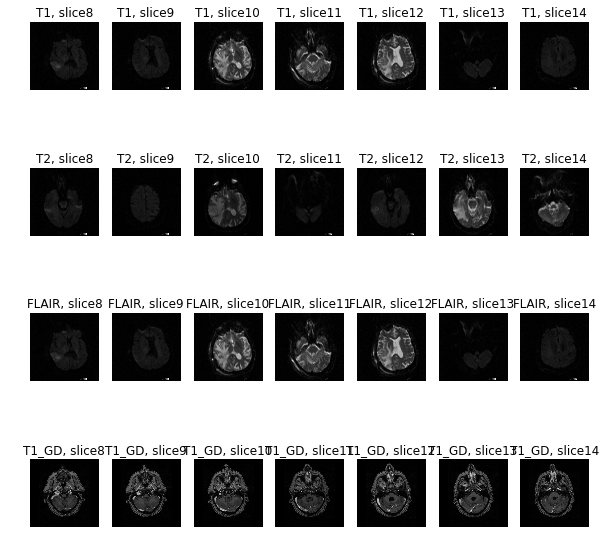

In [96]:
sitk_show_slices(img_4seq)

T1
Size: (256, 256, 60)
Origin: (-114.70562744140625, -114.29615783691406, 16.44131851196289)
Spacing: (0.8984375, 0.8984375, 32.5) 

T2
Size: (256, 256, 80)
Origin: (-115.0, -115.0, 23.379150390625)
Spacing: (0.8984375, 0.8984375, 52.0) 

FLAIR
Size: (256, 256, 60)
Origin: (-114.70562744140625, -114.29615783691406, 16.44131851196289)
Spacing: (0.8984375, 0.8984375, 32.5) 

T1_GD
Size: (512, 512, 60)
Origin: (-143.22894287109375, -138.53262329101562, -84.65164947509766)
Spacing: (0.546875, 0.546875, 3.0) 



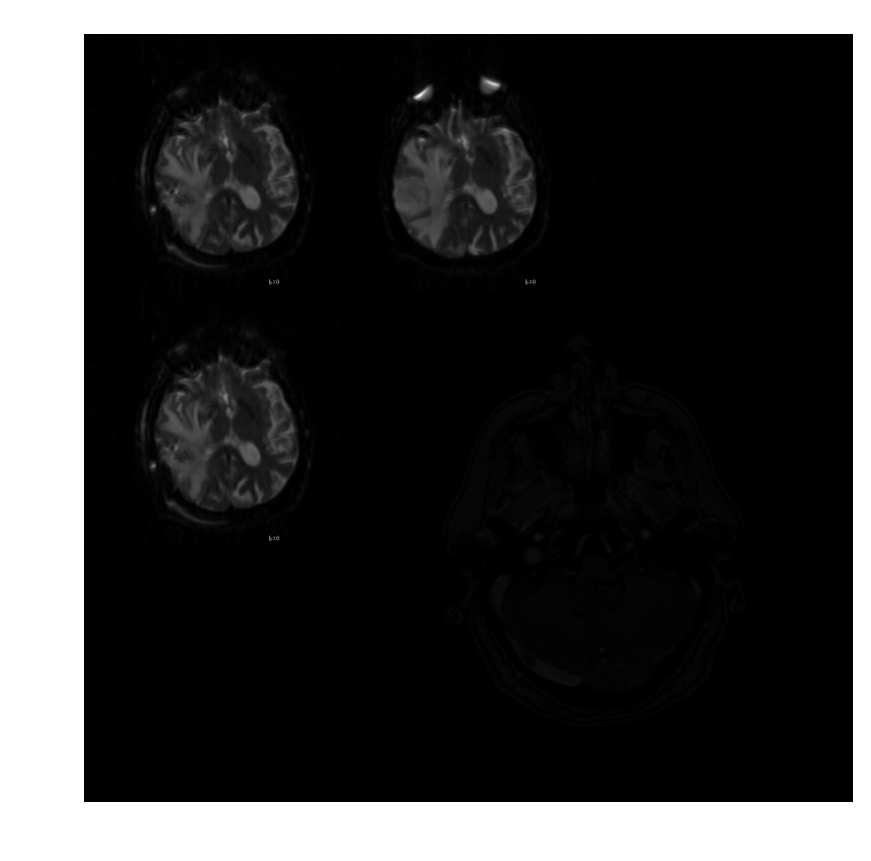

In [97]:
# Print image sizes and show images using the Tile function (agregates images in real size)
for seq, img in zip(sequence_names, img_4seq):
    print(seq)
    print('Size:', img.GetSize())
    print('Origin:', img.GetOrigin())
    print('Spacing:', img.GetSpacing(), '\n')
    
sitk_show(SimpleITK.Tile(img_T1_Original[:,:,10], img_T2_Original[:,:,10], 
                         img_FLAIR_Original[:,:,10], img_T1GD_Original[:,:,10], (2,2,0)),
         dpi=200)

In [98]:
# Define resample filter to match T1 image dimension and settings
resample = SimpleITK.ResampleImageFilter()
resample.SetReferenceImage(img_T1_Original)
resample.SetInterpolator(SimpleITK.sitkBSpline)

# Resize all other three images
img_T2_Resized = resample.Execute(img_T2_Original)
img_FLAIR_Resized = resample.Execute(img_FLAIR_Original)
img_T1GD_Resized = resample.Execute(img_T1GD_Original)

# Define list of all 4 resized images
img_4seq_resized = [img_T1_Original, img_T2_Resized, img_FLAIR_Resized, img_T1GD_Resized]

# Define list of images of slice 10 of the 4 sequences (2D images)
img_4seq_slice10 = [img_T1_Original[:,:,10], img_T2_Resized[:,:,10], 
                    img_FLAIR_Resized[:,:,10], img_T1GD_Resized[:,:,10]]

T1
Size: (256, 256, 60)
Origin: (-114.70562744140625, -114.29615783691406, 16.44131851196289)
Spacing: (0.8984375, 0.8984375, 32.5) 

T2
Size: (256, 256, 60)
Origin: (-114.70562744140625, -114.29615783691406, 16.44131851196289)
Spacing: (0.8984375, 0.8984375, 32.5) 

FLAIR
Size: (256, 256, 60)
Origin: (-114.70562744140625, -114.29615783691406, 16.44131851196289)
Spacing: (0.8984375, 0.8984375, 32.5) 

T1_GD
Size: (256, 256, 60)
Origin: (-114.70562744140625, -114.29615783691406, 16.44131851196289)
Spacing: (0.8984375, 0.8984375, 32.5) 



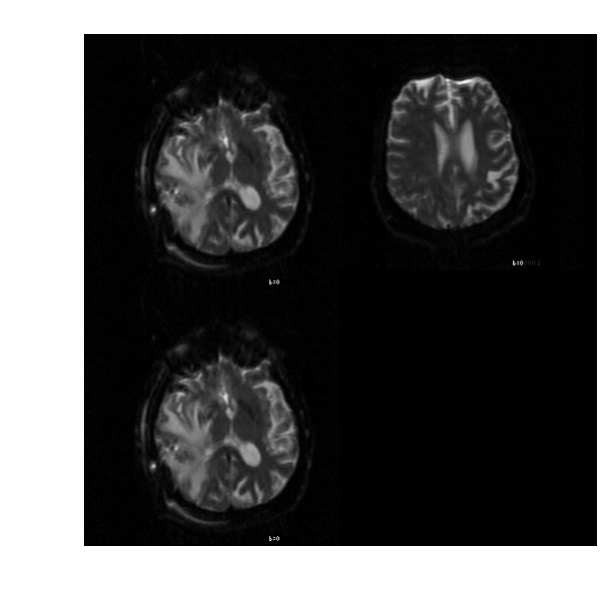

In [99]:
# Show that images are now all aligned

for seq, img in zip(sequence_names, img_4seq_resized):
    print(seq)
    print('Size:', img.GetSize())
    print('Origin:', img.GetOrigin())
    print('Spacing:', img.GetSpacing(), '\n')
    
sitk_show(SimpleITK.Tile(img_4seq_slice10, (2,2,0)),
         dpi=200)

/home/xenialxerus/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


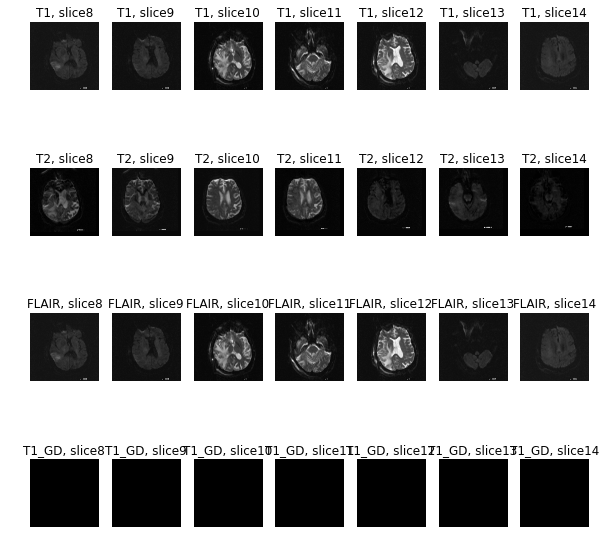

In [100]:
# Apply a curvature-flow filter to smoothen the image (get rid of image noise)

imgSmooth_4seq = []

for img in img_4seq_resized:
    imgSmooth_4seq.append(SimpleITK.CurvatureFlow(image1=img,
                                    timeStep=0.125,
                                    numberOfIterations=5))

sitk_show_slices(imgSmooth_4seq)

# BRAIN EXTRAXTION TOOL

We will use FSL Brain Extraxtion Tool (BET) to remove skull and Nipype for the FSL Python interface.  
FSL is a comprehensive library of analysis tools for FMRI, MRI and DTI brain imaging data. In particular the BET deletes non-brain tissue from an image of the whole head.  
Nipype is a Python-based workflow environment for neuroimaging that expands the potential applications of neuroimaging software by allowing different algorithms from different software packages (including FSL) to be utilized in a single workflow.  
   
References: 
 - Smith. S.M. Fast robust automated brain extraction. *Human Brain Mapping.* 2002:17(3):143-155.
 - Gorgolewski K J et al. Nipype: a flexible, lightweight and extensible neuroimaging data processing framework in Python. 2016. 0.12.0-rc1. Zenodo. 10.5281/zenodo.50186

In [101]:
import nipype.interfaces.fsl as fsl

In [103]:
for i, seq in zip(range(4), sequence_names):
    # Generate nii files (all slices in one file) to be inputed into BET
    SimpleITK.WriteImage(imgSmooth_4seq[i], "900-00-5299_{}.nii".format(seq))
    # Run BET on each sequence
    mybet = fsl.BET(in_file="900-00-5299_{}.nii".format(seq), out_file="900-00-5299_{}_NoBrain.nii".format(seq))
    mybet.run()

/home/xenialxerus/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


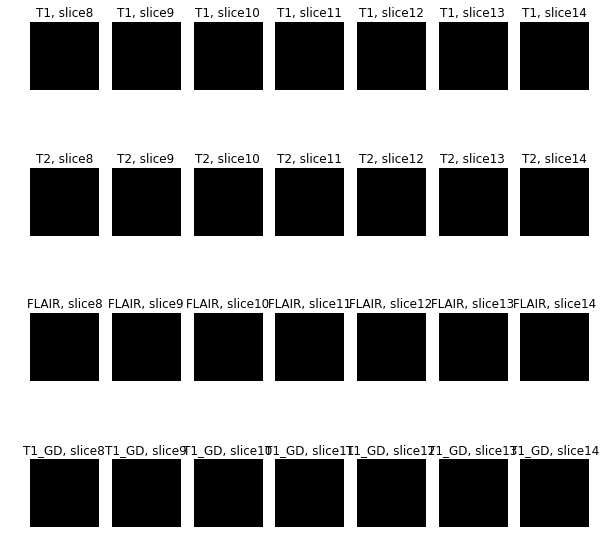

In [104]:
imgSmoothStripped_4seq = [SimpleITK.ReadImage("900-00-5299_{}_NoBrain.nii.gz".format(seq)) for seq in sequence_names]

sitk_show_slices(imgSmoothStripped_4seq)

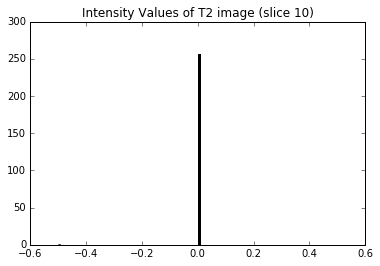

In [88]:
# Get histogram of T2 image intensities (slice 10)

intensity_values_T2 = SimpleITK.GetArrayFromImage(imgSmoothStripped_4seq[1][:,:,10])

plt.hist(intensity_values_T2, bins=100)
plt.title("Intensity Values of T2 image (slice 10)")
plt.show()

/home/xenialxerus/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


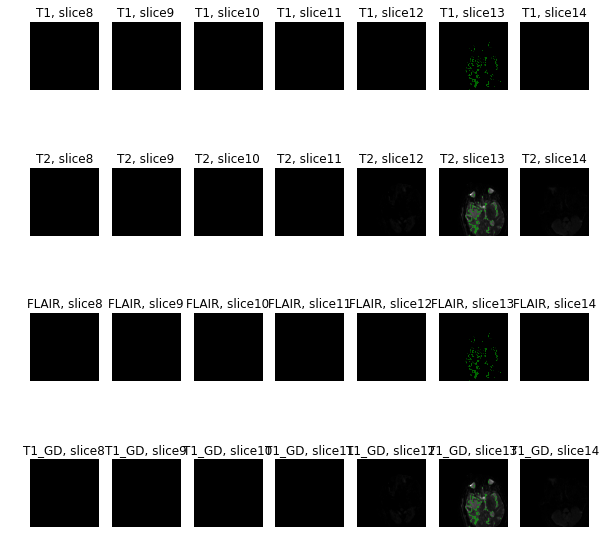

In [89]:
# Tumour segmentation with Binary Thresholding on T2 imaging

tumour_thres = SimpleITK.BinaryThreshold(imgSmoothStripped_4seq[1], lowerThreshold=700, upperThreshold=850, 
                                            insideValue=labelTumour, outsideValue=0)

# Rescale images intensity and change pixel type so they can be diplayed on the same image as tumour_thres
imgSmoothInt_4seq = []
for img in imgSmoothStripped_4seq:
    imgSmoothInt_4seq.append(SimpleITK.Cast(SimpleITK.RescaleIntensity(img), tumour_thres.GetPixelID()))

    
sitk_show_slices([SimpleITK.LabelOverlay(i, tumour_thres) for i in imgSmoothInt_4seq])

In [90]:
# Define initial slice to start looking for tumour
slice_max = 0

# Initialise filter to analyse tumour dimension in each slice
label_shape_analysis_thres = SimpleITK.LabelShapeStatisticsImageFilter()
label_shape_analysis_thres.SetBackgroundValue(0)
label_shape_analysis_thres.Execute(tumour_thres[:,:,slice_max])

# Check that tumour was detected in slice
if np.count_nonzero(SimpleITK.GetArrayFromImage(tumour_thres[:,:,slice_max])) > 0:
    # If so, compute number of pixels in tumour in this slice
    slice_pixels = label_shape_analysis_thres.GetNumberOfPixels(labelTumour)
else:
    slice_pixels = 0

# Loop through the rest of the slices and assign the slice with largest tumour area to slice_max
for s in range(slice_max+1, 20):
    if np.count_nonzero(SimpleITK.GetArrayFromImage(tumour_thres[:,:,s])) > 0:
        label_shape_analysis_thres.Execute(tumour_thres[:,:,s])
        pix = label_shape_analysis_thres.GetNumberOfPixels(labelTumour)
        if pix > slice_pixels:
            (slice_max, slice_pixels) = (s, pix)

print('Selected slice:', slice_max)

Selected slice: 13


/home/xenialxerus/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


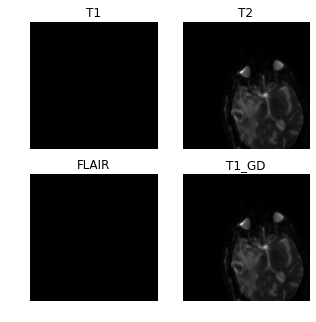

In [91]:
# Define image slice in all four sequences
imgSmooth_4seq_slice10 = [imgSmoothStripped_4seq[i][:,:,slice_max] for i in range(4)]

sitk_show_4seq(imgSmooth_4seq_slice10, size=(5,5))

In [93]:
# Find coordinates of points inside tumour on T2 image - AUTOMATICALLY
# These will be used as seeds for the Confidence Connected filter that we will use to isolate the tumour

# In this case we will use all the point that were identified by the initial thresholding
seeds_auto = np.argwhere(SimpleITK.GetArrayFromImage(tumour_thres[:,:,slice_max])==labelTumour)

# Inverse dimensions as the function GetArryFromImage returns vertical image values in lines and horizontal image values in columns 
for seed in seeds_auto:
    seed[0], seed[1] = seed[1], seed[0]

# Show seeds on the image by setting their pixel values to 0
seeds_locs = SimpleITK.Image(imgSmooth_4seq_slice10[1])
for pt in seeds_auto:
    seeds_locs.SetPixel(pt[0],pt[1],0)
    
sitk_show(seeds_locs, dpi=100)

TypeError: in method 'Image___SetPixelAsFloat__', argument 2 of type 'std::vector< uint32_t,std::allocator< uint32_t > > const &'

In [94]:
imgTumour = SimpleITK.ConfidenceConnected(image1=imgSmooth_4seq_slice10[1], 
                                               seedList=seeds_auto,
                                               numberOfIterations=3,
                                               multiplier=4,
                                               replaceValue=labelTumour)

# Display resulting segmentation on top of composed image
imgSmoothInt_T2 = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgSmooth_4seq_slice10[1]), 
                                           imgTumour.GetPixelID())

sitk_show(SimpleITK.LabelOverlay(imgSmoothInt_T2, imgTumour), dpi=100)

TypeError: in method 'ConfidenceConnected', argument 2 of type 'std::vector< std::vector< uint32_t,std::allocator< uint32_t > >,std::allocator< std::vector< uint32_t,std::allocator< uint32_t > > > > const &'

In [ ]:
# Refine tumour segmentation based on list of seeds previously assigned with Confidence Connected filter
imgTumour = SimpleITK.ConfidenceConnected(image1=imgSmooth_4seq_slice10[1], 
                                               seedList=seeds_auto,
                                               numberOfIterations=3,
                                               multiplier=4,
                                               replaceValue=labelTumour)

# Display resulting segmentation on top of composed image
imgSmoothInt_T2 = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgSmooth_4seq_slice10[1]), 
                                           imgTumour.GetPixelID())

sitk_show(SimpleITK.LabelOverlay(imgSmoothInt_T2, imgTumour), dpi=100)


## Conclusion

The project aim was to build a model to predict probabilities for a tumour to be of a certain type (Astrocytoma, Glioblastoma (GBM) or Oligodendroglioma) in order to assist radiologists in their diagnosis.

In order to select the most relevant model, we tested the cross-validated accuracy and confusion matrices of five different models (Logistic Regression, k-nearest neighbours (KNN), Random Forest, Linear Discriminant Analysis (LDA) and Naive Bayes. We then optimised the first three models parameters using GridSearchCV. Finally we tried reducing the number of features using the SelectKBest method, recursive feature elimination (RFE) and Random Forest's features ranking in order to improve model performance and reduce the number of features to be automtically extracted from other images. We performed the analysis on the initial VASARI dataset of 32 patients for whom 30 tumour features had been extracted manually by radiologists.

Based on this study, a random forest model with 25 estimators based on the selected 5 best tumour features (Enhancement quality, Proportion enhancing, Proportion necrosis, Proportion nCET, Thickness of enhancing margin) seemed to be performing best. The five features that were used (selected by SelectKBest) seemed to be consistent with the features selected by the other techniques - the top 3 features (Enhancement quality, Proportion nCET, Thickness of enhancing margin) were the same in all techniques and the others were in all techniques' top 10. The features also seem to be consistent with the main characteristics that differentiate tumours - in particular strong enhancement quality and necrosis characterise GBMs.

The selected model gives a cross-validated accuracy of 91% +/- 1.2%.

However this model has currently only been tested (cross-validated) on 32 samples so our model might be overfitting the data. We have also introduced some selection bias in our model accuracy as we optimised our models on the same set of data that was used to estimate the final model score. We will need to extract features from the remaining 98 images in order to provide an unbiased estimation of our model's performance.

Regarding image features extraction, some work remains to be done. So far we have been able to upload images for one patient, filter them to remove MRI noise and reshape them, isolate the tumour and extract half of the features. We tried to automate the tumour segmentation process and apply it to other patient images but our technique hasn't been successful so far. More research seems necessary to develop a robust segmentation method and to make sure that the extracted features are relevant from a medical point of view. 